In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [6]:
# Load the data
df = pd.read_csv('pokemon.csv')

# Display basic information about the dataset
# print(df.info())

# Show the first few rows
print(df.head())

# Basic statistics of numerical columns
# print(df.describe())

# Check for missing values
# print(df.isnull().sum())


   Number        Name          Type  Total  HP  Attack  Defense  Sp. Atk  \
0       1   Bulbasaur  Grass Poison    318  45      49       49       65   
1       2     Ivysaur  Grass Poison    405  60      62       63       80   
2       3    Venusaur  Grass Poison    525  80      82       83      100   
3       4  Charmander          Fire    309  39      52       43       60   
4       5  Charmeleon          Fire    405  58      64       58       80   

   Sp. Def  Speed  Generation  \
0       65     45         1.0   
1       80     60         1.0   
2      100     80         1.0   
3       50     65         1.0   
4       65     80         1.0   

                                           Image URL Height Weight  
0  https://img.pokemondb.net/sprites/home/normal/...    0.7    6.9  
1  https://img.pokemondb.net/sprites/home/normal/...    1.0   13.0  
2  https://img.pokemondb.net/sprites/home/normal/...    2.0  100.0  
3  https://img.pokemondb.net/sprites/home/normal/...    0.6    8.5  

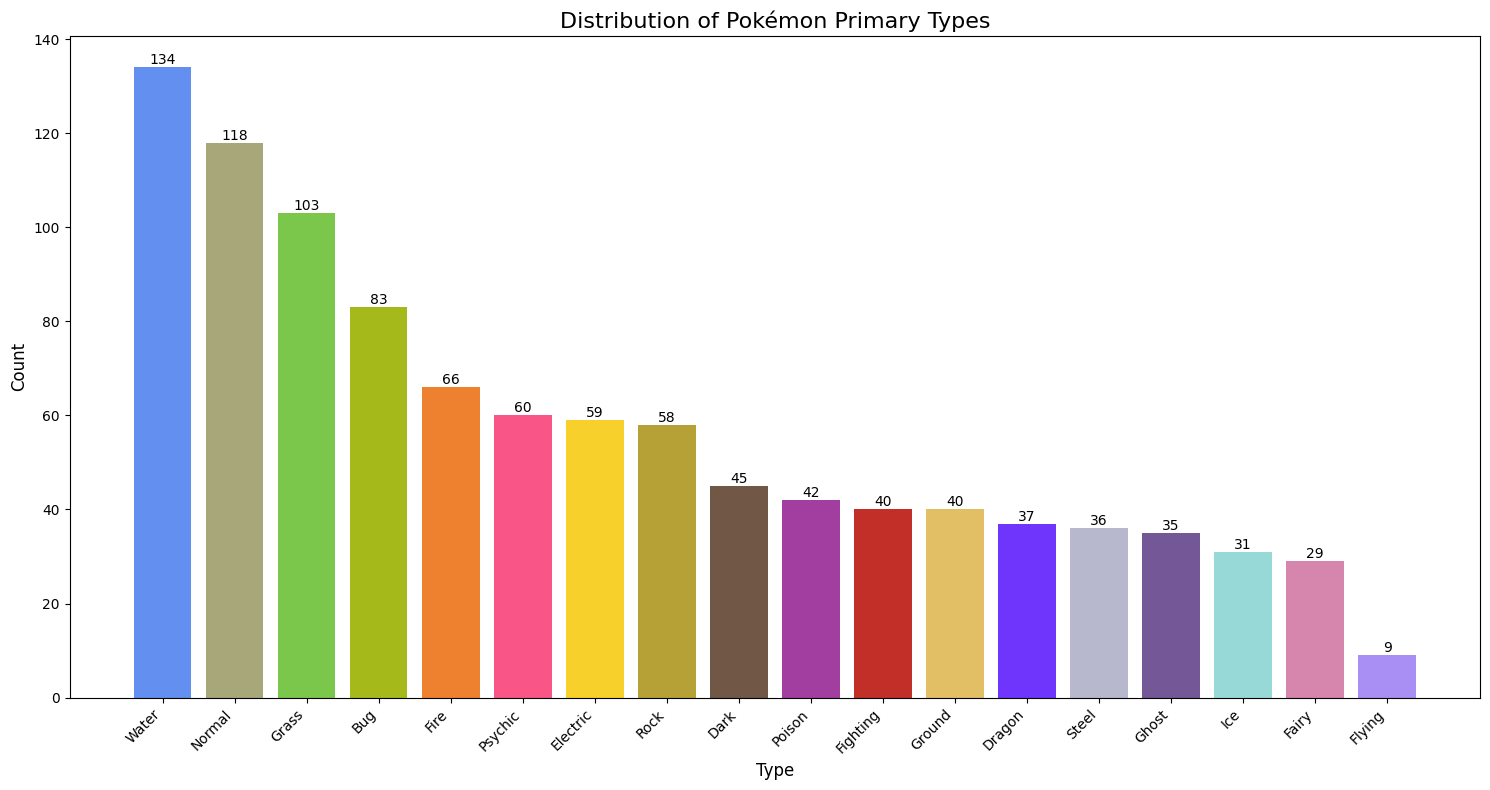

In [13]:
# Distribution of Types
# Extract primary type if not already done
df['Primary_Type'] = df['Type'].str.split().str[0]

# Define colors for each type
type_colors = {
    'Normal': '#A8A77A', 'Fire': '#EE8130', 'Water': '#6390F0',
    'Electric': '#F7D02C', 'Grass': '#7AC74C', 'Ice': '#96D9D6',
    'Fighting': '#C22E28', 'Poison': '#A33EA1', 'Ground': '#E2BF65',
    'Flying': '#A98FF3', 'Psychic': '#F95587', 'Bug': '#A6B91A',
    'Rock': '#B6A136', 'Ghost': '#735797', 'Dragon': '#6F35FC',
    'Dark': '#705746', 'Steel': '#B7B7CE', 'Fairy': '#D685AD'
}

# Count the primary types
type_counts = df['Primary_Type'].value_counts()

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(type_counts.index, type_counts.values, color=[type_colors.get(t, '#000000') for t in type_counts.index])

# Customize the plot
plt.title('Distribution of Pokémon Primary Types', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Show the plot
plt.show()

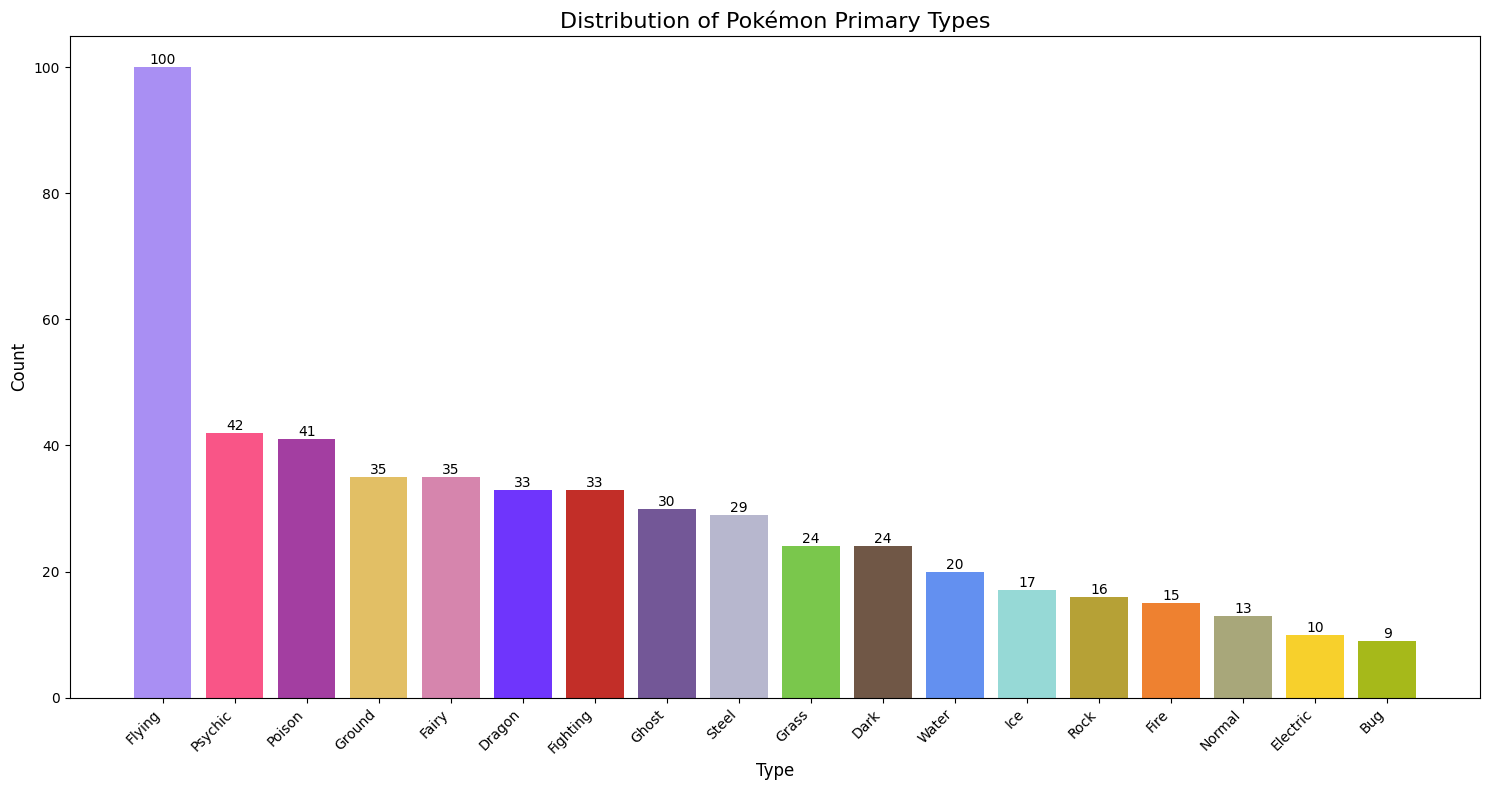

In [14]:
# Distribution of Secondary Types
# Extract secondary type if not already done
df['Secondary_Type'] = df['Type'].str.split().str[1]

# Define colors for each type
type_colors = {
    'Normal': '#A8A77A', 'Fire': '#EE8130', 'Water': '#6390F0',
    'Electric': '#F7D02C', 'Grass': '#7AC74C', 'Ice': '#96D9D6',
    'Fighting': '#C22E28', 'Poison': '#A33EA1', 'Ground': '#E2BF65',
    'Flying': '#A98FF3', 'Psychic': '#F95587', 'Bug': '#A6B91A',
    'Rock': '#B6A136', 'Ghost': '#735797', 'Dragon': '#6F35FC',
    'Dark': '#705746', 'Steel': '#B7B7CE', 'Fairy': '#D685AD'
}

# Count the primary types
type_counts = df['Secondary_Type'].value_counts()

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(type_counts.index, type_counts.values, color=[type_colors.get(t, '#000000') for t in type_counts.index])

# Customize the plot
plt.title('Distribution of Pokémon Primary Types', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Show the plot
plt.show()

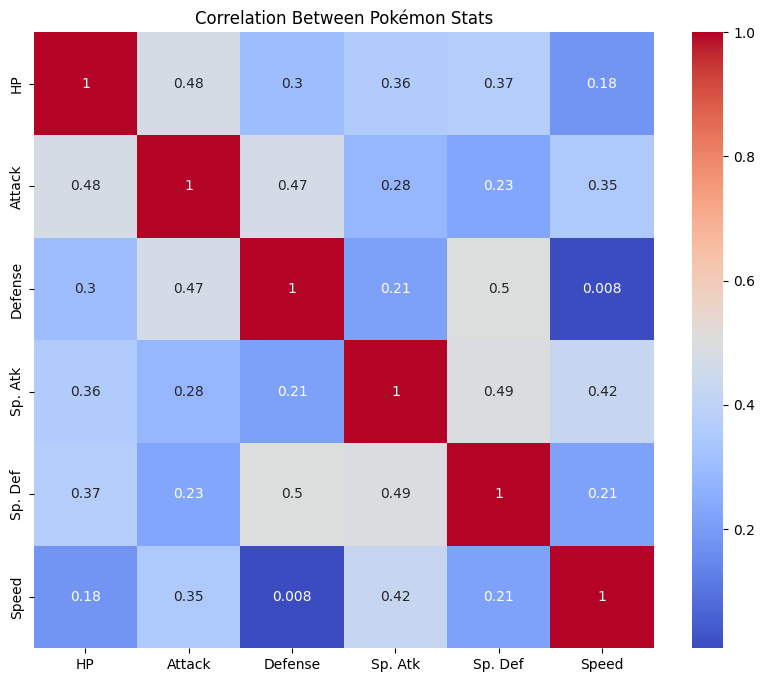

In [8]:
# Correlation between stats
correlation_matrix = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pokémon Stats')
plt.show()

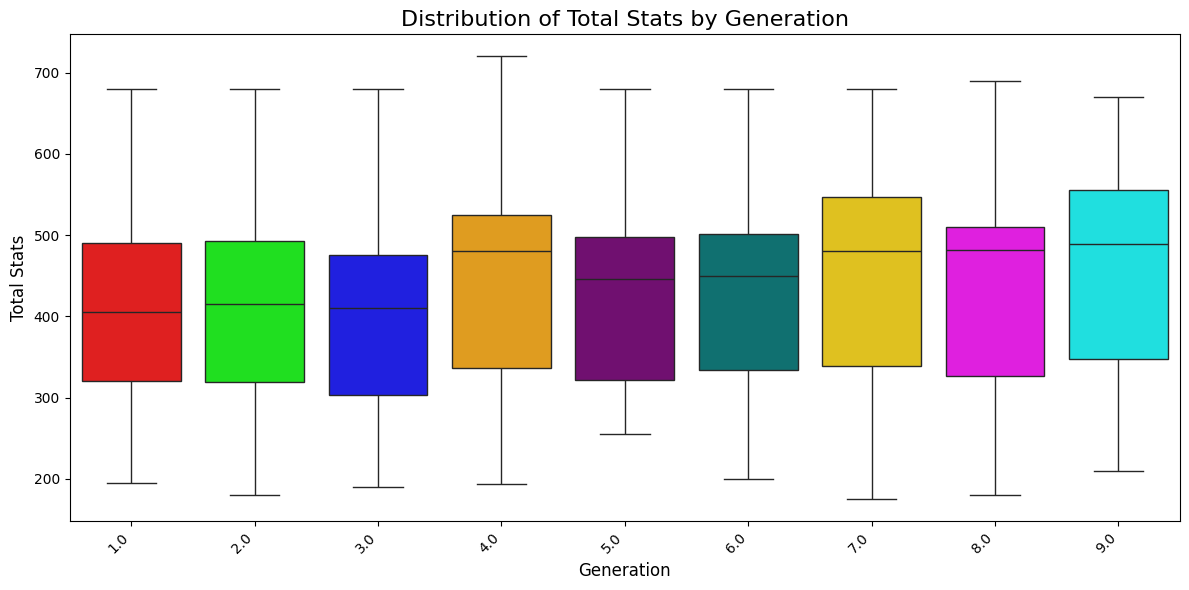

In [16]:
# Define a custom color palette with more distinct colors
custom_palette = ['#FF0000', '#00FF00', '#0000FF', '#FFA500', '#800080', '#008080', '#FFD700', '#FF00FF', '#00FFFF']

# Create the box plot with custom colors
plt.figure(figsize=(12, 6))
sns.boxplot(x='Generation', y='Total', hue='Generation', data=df, palette=custom_palette, legend=False)

plt.title('Distribution of Total Stats by Generation', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Total Stats', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

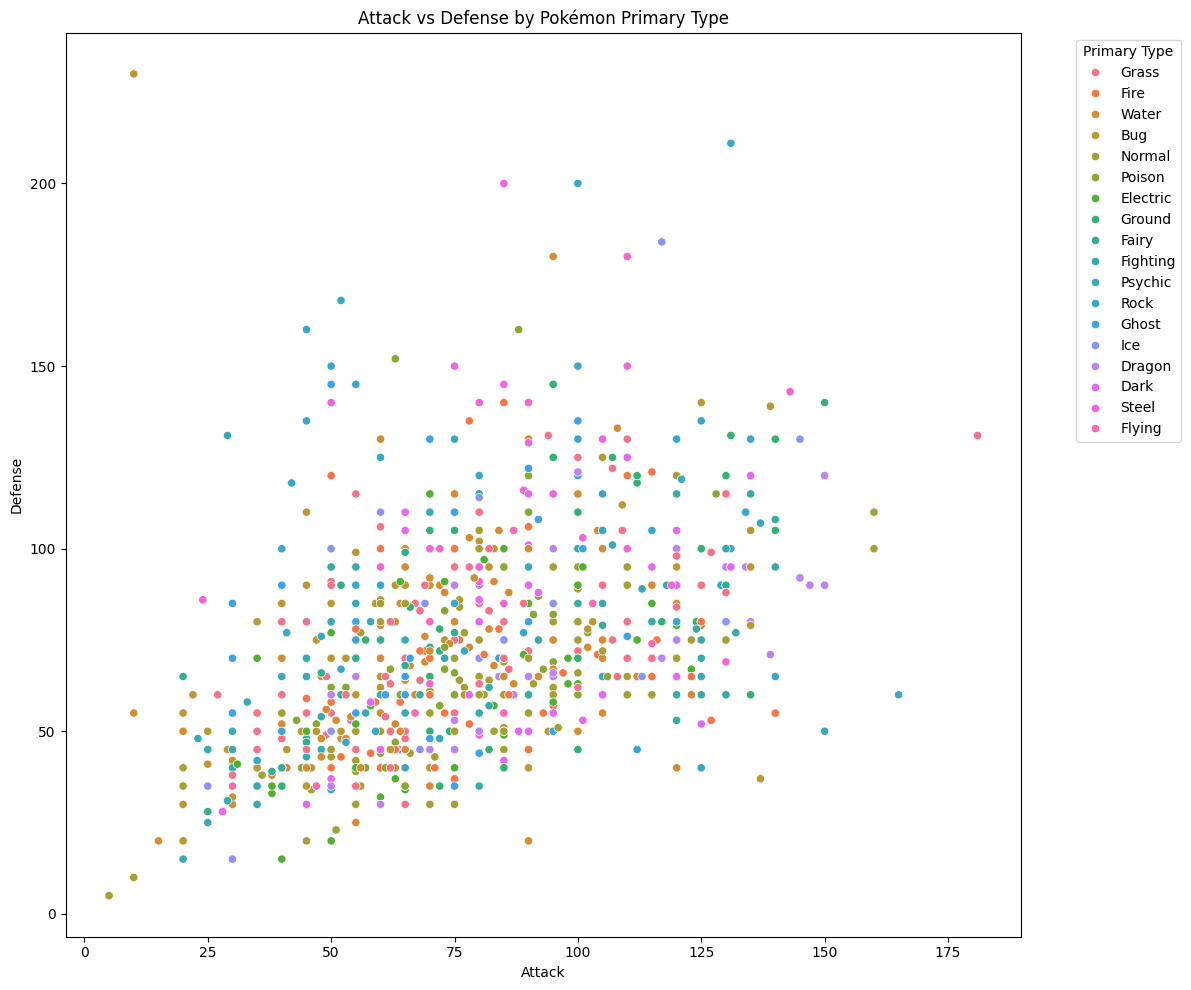

In [12]:
# Extract the primary type (first type listed) for each Pokémon
df['Primary_Type'] = df['Type'].str.split().str[0]

# Scatter plot of Attack vs Defense using primary types
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Attack', y='Defense', hue='Primary_Type', data=df)
plt.title('Attack vs Defense by Pokémon Primary Type')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

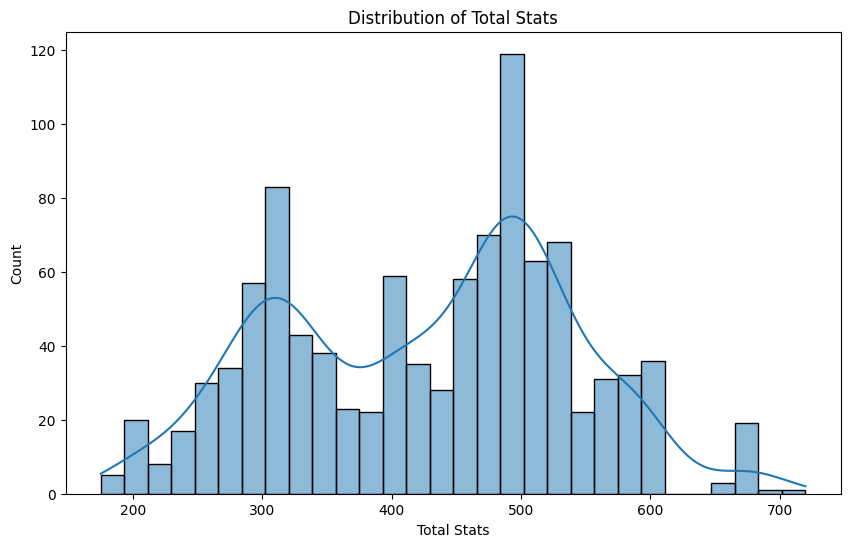

In [11]:
# Histogram of total stats
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=30, kde=True)
plt.title('Distribution of Total Stats')
plt.xlabel('Total Stats')
plt.show()